<center>

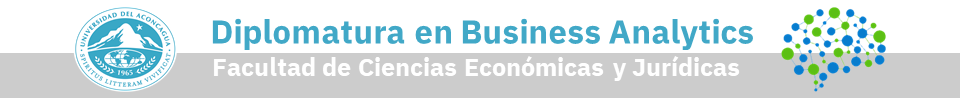

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 9

</font>
</center>

~~~
Apellido y Nombre: Liquitay Alexandra Romina
~~~

**Instrucciones del Trabajo Final**

- Desarrollar los puntos necesarios para generar los modelos de clasificación.
- Puede usar PyCaret, Scikit-learn o ambos
- Puede generar graficos en cualquier instancia del desarrollo
- Al final del colab, generar una breve conclusión
- Al finalizar, generar PDF del Google Colab para subir en plataforma

En virtud del DataFrame propuesto, generar modelos de clasificación para predecir la contratación de depositos a plazo:

- **age:** edad del cliente, valor numérico entero mayor a 18.
- **job:** trabajo del cliente.
- **marital:** estado civil del cliente.
- **education:** educación alcanzada por el cliente.
- **default:** si el cliente posee deudas.
- **balance:** depósito del cliente en euros.
- **housing:** propietario de inmueble o alquila.
- **loan:** si el cliente tiene un préstamo.
- **contact:** último contacto del cliente.
- **day:** día del último contacto del cliente.
- **month:** mes del último contacto el cliente.
- **duration:** duración del último contacto del cliente.
- **campaign:** identificación de la campaña.
- **pdays:** dias posteriores a la campaña.
- **previous:** números de contactos previos a la campaña.
- **poutcome:** resultados de la campaña anterior.
- **y:** si suscribe un depósito a plazo posterior a campaña.

###Problema de Negocio: ¿El cliente contratará o no contratará un depósito a plazo?

# **Carga de módulos y datos necesarios**

In [67]:
import pandas as pd #para la manipulación de los datos y la creación del DataFrame.
import numpy as np

In [ ]:
!pip install pycaret[full]

In [69]:
from pycaret.utils import enable_colab #Habilitar entorno Colab
enable_colab()

Colab mode enabled.


In [70]:
from pycaret.classification import * #Habilitar las funciones de clasificación


# **Creación del DataFrame**

In [71]:
url="https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/"
archivo="bank-full.csv"
clasificacion = pd.read_csv(url+archivo) #Lectura de Datos y creación del DataFrame
clasificacion.replace({"unknown": None}, inplace=True)

Variable Objetivo = "y". Con el modelo de clasificación se tratará de predecir las etiquetas de esta variable: contrata depósito a plazo / no contrata depósito a plazo


Vector de Entrada = Restantes variables (age, job, marital, etc.)

In [72]:
clasificacion.info() #Analizar las variables y el tipo de dato del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **División del conjunto de datos**

In [74]:
clientes_train = clasificacion.sample(frac=0.75, random_state=0)
#conjunto de datos de entrenamiento en base al conjunto de datos original (75%)
#seleccionados de manera aleatoria
clientes_test = clasificacion.drop(clientes_train.index) 
#conjunto de datos de prueba, 
#elimina de 'clasificación', todos los registros que están dentro del 
#objeto clientes_train

In [75]:
clasificacion.shape #verificar tamaño del conjunto de datos o dataset original

(45211, 17)

In [76]:
clientes_train.shape #verificar tamaño del conjunto de datos de entrenamiento (75% dataset original)

(33908, 17)

In [77]:
clientes_test.shape #verificar tamaño del conjunto de datos de testeo (25% dataset original)

(11303, 17)

In [78]:
print("Datos para Modelar: " + str(clientes_train.shape))
print("Datos no vistos para Predicciones: " + str(clientes_test.shape))

Datos para Modelar: (33908, 17)
Datos no vistos para Predicciones: (11303, 17)


#  **Configurar entorno de pycaret**

In [79]:
clasificacion = setup(data = clientes_test, target = "y", session_id=123) 
#Inicializar el entorno Pycaret y preparar los datos para el modelo 

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(11303, 17)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


#  **Determinar mejor modelo según PyCaret**

In [80]:
mejor_modelo=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9076,0.9300,0.4918,0.6695,0.5654,0.5152,0.5238,3.792
gbc,Gradient Boosting Classifier,0.9050,0.9221,0.4515,0.6672,0.5378,0.4871,0.4990,0.872
xgboost,Extreme Gradient Boosting,0.9033,0.9243,0.4990,0.6387,0.5590,0.5057,0.5113,3.281
lightgbm,Light Gradient Boosting Machine,0.9026,0.9254,0.4835,0.6365,0.5482,0.4948,0.5014,0.170
rf,Random Forest Classifier,0.9017,0.9185,0.3701,0.6856,0.4795,0.4306,0.4562,0.872
lr,Logistic Regression,0.9009,0.9077,0.3856,0.6671,0.4879,0.4375,0.4580,0.812
lda,Linear Discriminant Analysis,0.8994,0.9084,0.4567,0.6216,0.5256,0.4709,0.4784,0.061
ridge,Ridge Classifier,0.8991,0.0000,0.3206,0.6941,0.4372,0.3901,0.4260,0.028
ada,Ada Boost Classifier,0.8984,0.9061,0.4134,0.6327,0.4992,0.4455,0.4584,0.288
et,Extra Trees Classifier,0.8933,0.9016,0.3062,0.6372,0.4125,0.3618,0.3918,0.820


##Conclusiones iniciales:
####'Catboost' es el mejor modelo, ya que tiene una accuracy de 0.91, lo que significa que el modelo tiene un 91% de aciertos prediciendo si el cliente contrata o no contrata un depósito. 
####Sin embargo tiene un recall del 0.49, lo que significa que hay muchos 'falsos negativos', es decir que el modelo solo es capaz de identificar a la mitad de los interesados en contratar.
####En cuanto a precisión, el modelo dice que solo un 66% de los clientes estarán interesados en contratar, o dicho de otra forma, un 34% de las veces el modelo se equivocará al predecir si un cliente contrata o no contrata un depósito.

# **Generación del primer modelo de clasificación**

####Se tomará un clasificador que no es el óptimo para verificar si se pueden mejorar las métricas

In [81]:
modelo_01=create_model('dt')
print(modelo_01)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8674,0.6894,0.4536,0.4583,0.4560,0.3805,0.3805
1,0.8801,0.7454,0.5670,0.5093,0.5366,0.4679,0.4688
2,0.8723,0.6967,0.4639,0.4787,0.4712,0.3986,0.3987
3,0.8812,0.7239,0.5155,0.5155,0.5155,0.4477,0.4477
4,0.8685,0.6723,0.4124,0.4598,0.4348,0.3606,0.3613
5,0.8496,0.6881,0.4742,0.4035,0.4360,0.3499,0.3514
6,0.8559,0.6563,0.3918,0.4086,0.4000,0.3181,0.3182
7,0.8609,0.6990,0.4845,0.4393,0.4608,0.3812,0.3818
8,0.8647,0.6835,0.4433,0.4479,0.4456,0.3686,0.3686
9,0.8673,0.6938,0.4639,0.4592,0.4615,0.3858,0.3858


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# **Generación del segundo modelo de clasificación**

####Optimizar el modelo anterior para mejorar las métricas

In [82]:
optimizar_dt = tune_model(modelo_01)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8939,0.8689,0.3608,0.6140,0.4545,0.4002,0.4176
1,0.8902,0.8501,0.3196,0.5962,0.4161,0.3615,0.3830
2,0.8938,0.8372,0.3814,0.6066,0.4684,0.4127,0.4265
3,0.9102,0.8509,0.4742,0.6970,0.5644,0.5164,0.5283
4,0.8976,0.8176,0.3711,0.6429,0.4706,0.4184,0.4378
5,0.8951,0.8275,0.4021,0.6094,0.4845,0.4288,0.4403
6,0.8875,0.8051,0.4330,0.5526,0.4855,0.4234,0.4274
7,0.8963,0.7614,0.4227,0.6119,0.5000,0.4443,0.4538
8,0.8900,0.8588,0.4227,0.5694,0.4852,0.4251,0.4311
9,0.9039,0.8374,0.3918,0.6909,0.5000,0.4513,0.4736


###Se observa que las métricas de accuray y precisión aumentaron, no así recall que disminuyó.

# **Conclusiones**

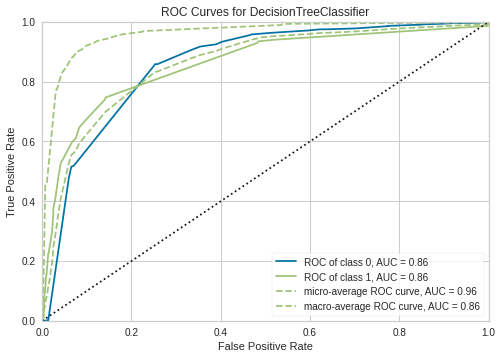

In [83]:
plot_model(optimizar_dt, plot = 'auc')

###Curva ROC
Si AUC es 0.86, significa que existe un 86% de probabilidad de la que la predicción sea correcta, el cual es un valor aceptable o una predicción buena.

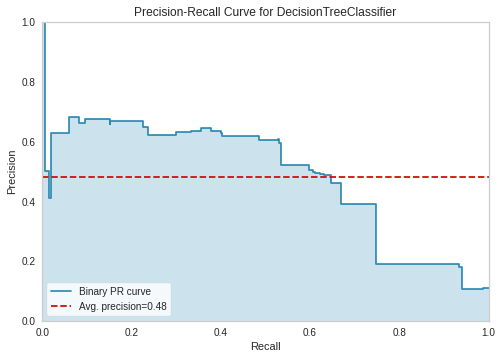

In [84]:
plot_model(optimizar_dt, plot = 'pr')

###Curva PR 
El valor de precision promedio 0.48 indica que este modelo de árbol de decisión no el mejor clasificador para este dataset, ya que no estaría optimizando el valor de precisión y recall.

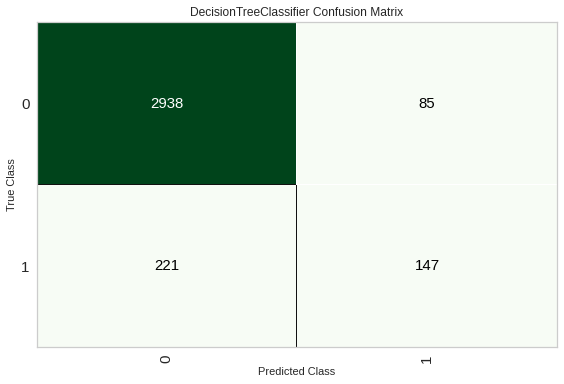

In [85]:
plot_model(optimizar_dt, plot = 'confusion_matrix')

###Matriz de confusión


*   Verdaderos Positivos: 2938
*   Verdaderos Negativos: 147
*   Falsos Positivos: 221
*   Falsos Negativos: 85




In [86]:
evaluate_model(optimizar_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

###Predicción sobre datos de prueba

Para hacer una predicción con el modelo entrenado, sobre el conjunto de datos de prueba.

In [87]:
predict_model(optimizar_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9098,0.8603,0.3995,0.6336,0.49,0.4433,0.4575


,age,balance,day,duration,campaign,pdays,previous,job_None,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_None,education_primary,education_secondary,education_tertiary,default_no,housing_yes,loan_no,contact_None,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_None,poutcome_failure,poutcome_other,poutcome_success,y,Label,Score
0,33.0,1722.0,20.0,7.0,7.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9855
1,59.0,2034.0,20.0,218.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9312
2,51.0,2523.0,16.0,150.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9855
3,57.0,1292.0,1.0,151.0,1.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9312
4,29.0,596.0,18.0,172.0,2.0,346.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,57.0,0.0,6.0,83.0,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9855
3387,32.0,159.0,14.0,46.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9855
3388,58.0,256.0,10.0,422.0,1.0,188.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,yes,yes,0.8312
3389,38.0,64.0,6.0,789.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.6304


# Predecir sobre datos de prueba

In [93]:
clientes_test_prediccion = predict_model(final_dt, data=clientes_test)
clientes_test_prediccion.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Label,Score,Score
5,35,management,married,tertiary,no,231,yes,no,None,5,may,139,1,-1,0,None,no,no,0.9754,0.9754
10,41,admin.,divorced,secondary,no,270,yes,no,None,5,may,222,1,-1,0,None,no,no,0.9754,0.9754
11,29,admin.,single,secondary,no,390,yes,no,None,5,may,137,1,-1,0,None,no,no,0.9754,0.9754
13,58,technician,married,None,no,71,yes,no,None,5,may,71,1,-1,0,None,no,no,0.9754,0.9754
19,33,services,married,secondary,no,0,yes,no,None,5,may,54,1,-1,0,None,no,no,0.9754,0.9754
21,56,management,married,tertiary,no,779,yes,no,None,5,may,164,1,-1,0,None,no,no,0.9754,0.9754
26,39,management,single,tertiary,no,255,yes,no,None,5,may,296,1,-1,0,None,no,no,0.9914,0.9914
30,57,technician,married,secondary,no,839,no,yes,None,5,may,225,1,-1,0,None,no,no,0.9754,0.9754
41,50,management,married,secondary,no,49,yes,no,None,5,may,180,2,-1,0,None,no,no,0.9754,0.9754
43,54,retired,married,secondary,no,529,yes,no,None,5,may,1492,1,-1,0,None,no,no,0.5333,0.5333


# Finalizando el modelo para implementación

Para utilizar con otros datos de prueba o datos nuevos

In [94]:
final_dt = finalize_model(optimizar_dt)
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
